In [3]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures 
import matplotlib.pyplot as plt

In [4]:
###### IMPORTAR LOS DATOS #######

boston = datasets.load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [5]:
###### COMPRENDER LOS DATOS #######

print(boston.keys())
print(boston.DESCR)
print(boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,0

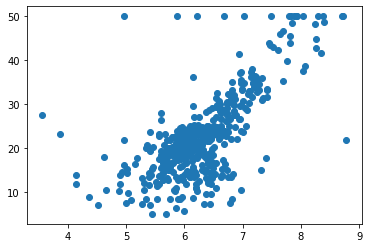

In [6]:
###### PREPARAR LOS DATOS ######

#Numero de habitaciones columana numero 6
X_p = boston.data[:, np.newaxis, 5]

y_p = boston.target

#Graficamos los datos
plt.scatter(X_p, y_p)
plt.show()

In [7]:
###### IMPLEMENTACION DE REGRESION POLINOMIAL ######

from sklearn.model_selection import train_test_split


In [8]:
#Separar datos en entrenamiento y prueba
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2)

#Definimos el grado del Polinomio
poli_reg = PolynomialFeatures(degree = 2)

#Transformar la caracteristicas en dependencia del grado del polinomio
X_train_poli = poli_reg.fit_transform(X_train_p)
X_test_poli = poli_reg.fit_transform(X_test_p)

#Definimos el algoritmo a utilizar
pr = linear_model.LinearRegression()

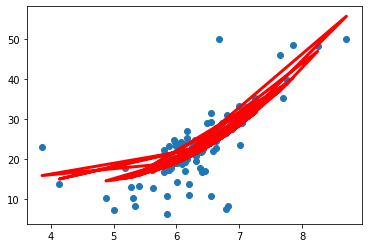

In [9]:
#Entrenamos el modelo
pr.fit(X_train_poli, y_train_p)

#Reailizar una prediccion
Y_pred_pr = pr.predict(X_test_poli)

#Graficamos los datos junto con el modelo
plt.scatter(X_test_p, y_test_p)
plt.plot(X_test_p, Y_pred_pr, color='red', lineWidth=3)
plt.show()

In [10]:
#Datos del modelo de regresion polinomial
print('DATOS DEL MODELO REGRESION POLINOMIAL')

print('Valor de la pendiente o coeficiente "a":')
print(pr.coef_)

print('Valor de la interseccion o coeficiente "b":')
print(pr.intercept_)

#Cuanto mas se acerque a 1 mejor sera el algoritmo
print('Presicion del modelo:')
print(pr.score(X_train_poli, y_train_p))

DATOS DEL MODELO REGRESION POLINOMIAL
Valor de la pendiente o coeficiente "a":
[  0.         -23.11833042   2.49483807]
Valor de la interseccion o coeficiente "b":
67.97704100707352
Presicion del modelo:
0.5311025325906445
